In [2]:
import datasource as ds
import passencoder as pss
import pandasql as ps
import pandas as pd
u, p = pss.load_userpwd(r'C:\Users\razamo3\Documents\pass')



import numpy as np
import matplotlib.pyplot as plt

### Cleaning up table




In [3]:
initial_table = pd.read_pickle("tables/3c_final_df.pkl")

In [4]:
initial_table

,custnum,mtg_ind,Resubmit_Num,Interest_Rate,Total_Credit_Limit,Agreed_Term_Mm,Postal_Code_Key,Builder_Ind,Tds,Ltv,Gds,Beacon_Score,Construction_Type_Name,Non_Perm_Residt_Ind,New2Canada_Ind,Agreed_Amortizn_Mm,Rental_Ind,BYear,Sex,CustSince
0,361698039,1,3,2.84,60000.00,24,999999,0,40.34,0.13953,39.10,802,Detached,None,0,300,0,193808.0,M,199806.0
1,202474143,1,10,2.84,142500.00,60,999999,0,35.94,0.75000,17.13,637,Detached,None,0,300,0,196111.0,M,199606.0
2,687151845,1,6,2.31,364000.00,36,999999,0,40.09,0.80000,22.72,725,Detached,None,0,300,0,197611.0,F,201510.0
3,205593957,1,5,2.70,419900.00,60,L6Y3V1,0,39.97,0.95000,34.19,662,Detached,None,0,300,0,197301.0,M,200010.0
4,67805955,1,1,2.84,87000.00,36,999999,0,23.53,0.42439,9.38,817,Detached,None,0,115,0,197101.0,M,198906.0
5,501998022,1,5,3.89,555695.23,48,T8N5K5,0,39.81,0.94274,19.05,649,Detached,None,0,281,0,197606.0,F,200510.0
6,611027892,1,0,3.14,190000.00,6,999999,0,41.16,0.76000,17.32,732,Detached,None,0,300,0,197005.0,M,200010.0
7,286878762,1,3,2.89,1125000.00,60,V5P1S1,0,42.82,0.75000,38.18,805,Detached,None,0,300,0,197911.0,M,199807.0
8,393390378,1,1,3.04,408000.00,48,999999,0,32.04,0.74182,27.68,708,Detached,None,0,360,0,198006.0,M,199807.0
9,364847571,1,3,2.59,799200.00,60,N0B1T0,0,42.94,0.80000,11.19,788,Detached,None,0,360,0,197312.0,M,199902.0


In [5]:
#Drop Any Duplicate Rows
print(initial_table.shape)
initial_table = initial_table.drop_duplicates()
print(initial_table.shape)

(27384, 20)
(26820, 20)


In [6]:
all_features = ['custnum', 'Resubmit_Num', 'Interest_Rate', 'Total_Credit_Limit', 'Agreed_Term_Mm', 'Postal_Code_Key'
                ,'Builder_Ind', 'Tds', 'Ltv', 'Gds', 'Beacon_Score', 'Construction_Type_Name', 'Non_Perm_Residt_Ind'
                , 'New2Canada_Ind', 'Agreed_Amortizn_Mm', 'Rental_Ind']

#Split feautres in their respective categories
customer_feautres = ['Tds', 'Gds', 'BYear', 'Sex', 'New2Canada_Ind', 'Builder_Ind' ]

property_features = ['Rental_Ind', 'Postal_Code_Key']

numerical_features = ['Resubmit_Num', 'Interest_Rate', 'Total_Credit_Limit', 'Agreed_Term_Mm', 'Builder_Ind', 'Tds', 'Ltv', 'Gds'
                         , 'Beacon_Score', 'Rental_Ind', 'BYear', 'CustSince']

target = ['mtg_ind']

initial_table

,custnum,mtg_ind,Resubmit_Num,Interest_Rate,Total_Credit_Limit,Agreed_Term_Mm,Postal_Code_Key,Builder_Ind,Tds,Ltv,Gds,Beacon_Score,Construction_Type_Name,Non_Perm_Residt_Ind,New2Canada_Ind,Agreed_Amortizn_Mm,Rental_Ind,BYear,Sex,CustSince
0,361698039,1,3,2.84,60000.00,24,999999,0,40.34,0.13953,39.10,802,Detached,None,0,300,0,193808.0,M,199806.0
1,202474143,1,10,2.84,142500.00,60,999999,0,35.94,0.75000,17.13,637,Detached,None,0,300,0,196111.0,M,199606.0
2,687151845,1,6,2.31,364000.00,36,999999,0,40.09,0.80000,22.72,725,Detached,None,0,300,0,197611.0,F,201510.0
3,205593957,1,5,2.70,419900.00,60,L6Y3V1,0,39.97,0.95000,34.19,662,Detached,None,0,300,0,197301.0,M,200010.0
4,67805955,1,1,2.84,87000.00,36,999999,0,23.53,0.42439,9.38,817,Detached,None,0,115,0,197101.0,M,198906.0
5,501998022,1,5,3.89,555695.23,48,T8N5K5,0,39.81,0.94274,19.05,649,Detached,None,0,281,0,197606.0,F,200510.0
6,611027892,1,0,3.14,190000.00,6,999999,0,41.16,0.76000,17.32,732,Detached,None,0,300,0,197005.0,M,200010.0
7,286878762,1,3,2.89,1125000.00,60,V5P1S1,0,42.82,0.75000,38.18,805,Detached,None,0,300,0,197911.0,M,199807.0
8,393390378,1,1,3.04,408000.00,48,999999,0,32.04,0.74182,27.68,708,Detached,None,0,360,0,198006.0,M,199807.0
9,364847571,1,3,2.59,799200.00,60,N0B1T0,0,42.94,0.80000,11.19,788,Detached,None,0,360,0,197312.0,M,199902.0


In [7]:
#Filter data for only -1 and 1 mtg_ind
binarymtgind_df = initial_table[initial_table.mtg_ind !=0]


# # convert all -1 to 0 
for i in range(0,binarymtgind_df.shape[0],1):
    if binarymtgind_df.iloc[i,1] == -1:
        binarymtgind_df.iloc[i,1] = 0
    else:
        pass

C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
cleaned_df = binarymtgind_df.fillna(0)

In [9]:
cleaned_df[numerical_features]

,Resubmit_Num,Interest_Rate,Total_Credit_Limit,Agreed_Term_Mm,Builder_Ind,Tds,Ltv,Gds,Beacon_Score,Rental_Ind,BYear,CustSince
0,3,2.84,60000.00,24,0,40.34,0.13953,39.10,802,0,193808.0,199806.0
1,10,2.84,142500.00,60,0,35.94,0.75000,17.13,637,0,196111.0,199606.0
2,6,2.31,364000.00,36,0,40.09,0.80000,22.72,725,0,197611.0,201510.0
3,5,2.70,419900.00,60,0,39.97,0.95000,34.19,662,0,197301.0,200010.0
4,1,2.84,87000.00,36,0,23.53,0.42439,9.38,817,0,197101.0,198906.0
5,5,3.89,555695.23,48,0,39.81,0.94274,19.05,649,0,197606.0,200510.0
6,0,3.14,190000.00,6,0,41.16,0.76000,17.32,732,0,197005.0,200010.0
7,3,2.89,1125000.00,60,0,42.82,0.75000,38.18,805,0,197911.0,199807.0
8,1,3.04,408000.00,48,0,32.04,0.74182,27.68,708,0,198006.0,199807.0
9,3,2.59,799200.00,60,0,42.94,0.80000,11.19,788,0,197312.0,199902.0


In [10]:
import statsmodels.api as sm
X = cleaned_df[numerical_features] 
y = cleaned_df[target]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.183348
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.202    
Dependent Variable:   mtg_ind          AIC:              9152.5260
Date:                 2018-10-09 16:58 BIC:              9249.9945
No. Observations:     24894            Log-Likelihood:   -4564.3  
Df Model:             11               LL-Null:          -5716.9  
Df Residuals:         24882            LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       7.0000                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Resubmit_Num        0.0588   0.0163  3.5965 0.0003  0.0267  0.0908
Interest_Rate      -0.4940   0.0546 -9.0427 0.0000 -0

In [11]:
#Retry with filtered features
filtered_pred_features = ['Resubmit_Num', 'Interest_Rate', 'Total_Credit_Limit', 'CustSince', 'Rental_Ind']

X = cleaned_df[filtered_pred_features] 
y = cleaned_df[target]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.184533
         Iterations 7
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.196    
Dependent Variable:  mtg_ind           AIC:               9197.5408
Date:                2018-10-09 16:58  BIC:               9238.1527
No. Observations:    24894             Log-Likelihood:    -4593.8  
Df Model:            4                 LL-Null:           -5716.9  
Df Residuals:        24889             LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      7.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Resubmit_Num        0.0515   0.0159   3.2414 0.0012  0.0204  0.0827
Interest_Rate      -0.6812   0.0422 -16.1

### Setting model hyperparameters

In [12]:

# Inverse Regularization strength; must be +ve float value, lower number--> stronger regulizer 
C1 = 1.0

# Tolernace to convergence
tol1 = 1e-4

#Max Iterations
max_iter1 = 100

# Optimization method; choose between {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
solver1 = 'liblinear'

# Warm start --> use soloution from previously fitted model
warm_start1 = False 

### Training Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = cleaned_df[filtered_pred_features] 
y = cleaned_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle = True)

model_logreg = LogisticRegression(C=C1, tol=tol1, max_iter = max_iter1, solver = solver1).fit(X_train, y_train)

C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
y_pred = model_logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [15]:
model_logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Confusion Matrix

In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

incorrectPredictions = confusion_matrix[0,1] + confusion_matrix[1,0]
correctPredictions = confusion_matrix[0,0] + confusion_matrix[1,1]
print("perecent correct %f" %(correctPredictions/(incorrectPredictions+correctPredictions)))

[[ 116  359]
 [   1 6993]]
perecent correct 0.951801


### Cross Validation Score

In [17]:
from sklearn.model_selection import cross_val_score

X = cleaned_df[numerical_features] 
y = cleaned_df[target]

scores = cross_val_score(model_logreg, X, y, cv=4)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A 

[0.95437018 0.95919023 0.95034549 0.95741604]
0.9553304852799569


### Precision Score

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.23      0.37       427
          1       0.96      1.00      0.98      7036

avg / total       0.96      0.96      0.94      7463



## Does Cleaning up the data impact the results?

### Cleaning up BYear & custSince

In [87]:
df2 = cleaned_df[numerical_features]
def f(x): 
    if x == 0:
        return(0)
    else:
        return(201810.0 - x)/100

In [88]:
df2['CustYrsSince'] = df2['CustSince'].transform(f)
df2['Age'] = df2['BYear'].transform(f)

C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### testing model to see if it makes a diff 

In [91]:
import statsmodels.api as sm
X = df2
y = cleaned_df[target]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

#Doesnt make a difference so we will ditch this

Optimization terminated successfully.
         Current function value: 0.184786
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.190    
Dependent Variable:   mtg_ind          AIC:              9221.1274
Date:                 2018-10-03 14:31 BIC:              9334.8301
No. Observations:     24875            Log-Likelihood:   -4596.6  
Df Model:             13               LL-Null:          -5671.9  
Df Residuals:         24861            LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       7.0000                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Resubmit_Num        0.0616   0.0162  3.7944 0.0001  0.0298  0.0934
Interest_Rate      -0.4725   0.0556 -8.5005 0.0000 -0

# Looking at Partial Dependency Plots

In [113]:
cleaned_df[filtered_pred_features]

,Resubmit_Num,Interest_Rate,Total_Credit_Limit,CustSince,Rental_Ind
0,5.0,2.20,179920.00,201704.0,1.0
1,0.0,2.79,136737.33,200005.0,0.0
2,4.0,3.14,456000.00,201004.0,0.0
3,3.0,2.55,227240.00,201009.0,0.0
4,4.0,2.84,265000.00,200706.0,0.0
5,7.0,2.69,564000.00,200107.0,0.0
6,1.0,2.59,125000.00,200305.0,0.0
7,3.0,2.39,299711.70,201301.0,0.0
8,0.0,2.99,116500.00,197505.0,0.0
9,4.0,2.54,220000.00,199507.0,0.0


In [117]:
filtered_pred_features

['Resubmit_Num',
 'Interest_Rate',
 'Total_Credit_Limit',
 'CustSince',
 'Rental_Ind']

In [114]:
cleaned_df[target]

,mtg_ind
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


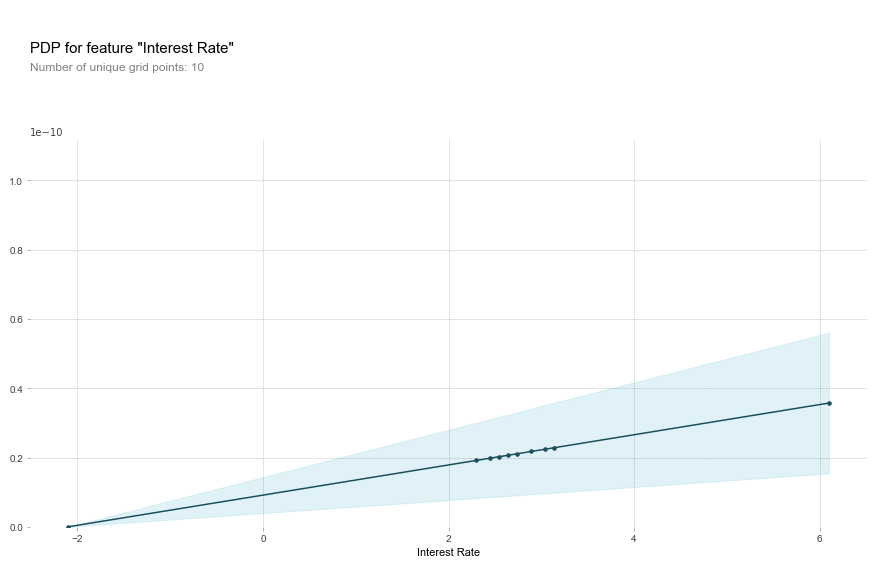

In [126]:
from pdpbox import pdp, get_dataset, info_plots
pdp_interest = pdp.pdp_isolate(model = model_logreg, dataset = X_train, model_features=filtered_pred_features, feature = 'Interest_Rate')

pdp.pdp_plot(pdp_interest,'Interest Rate')
plt.show()

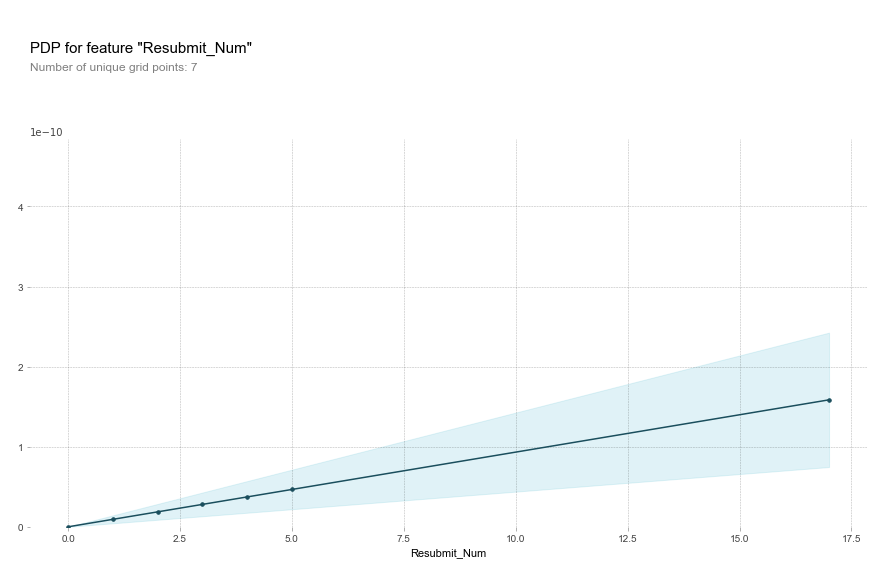

In [124]:
feature_to_plot = "Resubmit_Num"
pdp_resubmit = pdp.pdp_isolate(model = model_logreg, dataset = X_test, model_features=filtered_pred_features, feature = feature_to_plot)

pdp.pdp_plot(pdp_resubmit, feature_to_plot)
plt.show()

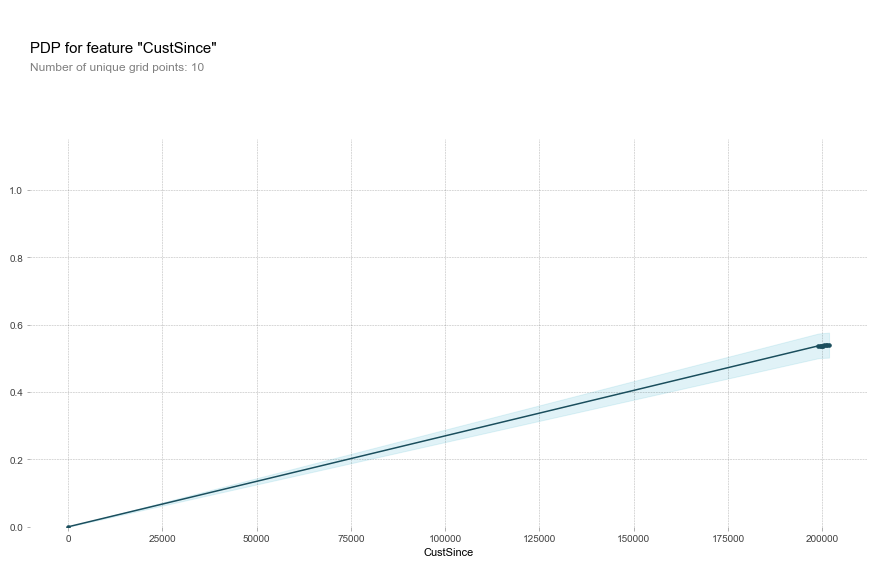

In [125]:
feature_to_plot = "CustSince"
pdp_feat = pdp.pdp_isolate(model = model_logreg, dataset = X_test, model_features=filtered_pred_features, features = feature_to_plot)

pdp.pdp_plot(pdp_feat, feature_to_plot)
plt.show()

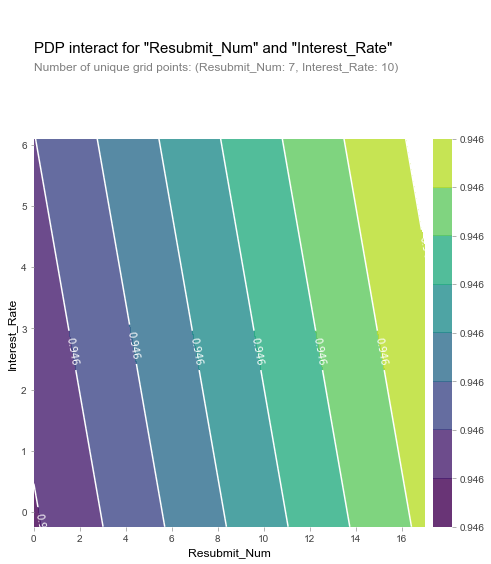

In [128]:
features_to_plot = ['Resubmit_Num', 'Interest_Rate']
inter1 = pdp.pdp_interact(model = model_logreg, dataset = X_test, model_features=filtered_pred_features, features = features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type ='contour')
plt.show()

In [123]:
filtered_pred_features

['Resubmit_Num',
 'Interest_Rate',
 'Total_Credit_Limit',
 'CustSince',
 'Rental_Ind']

In [133]:
### Saving model

import pickle
model_filename = '1-logRegModel.sav'
pickle.dump(model_logreg, open(model_filename, 'wb'))

In [6]:
# Loading Model
import pickle
from sklearn.linear_model import LogisticRegression
model_filename = '1-logRegModel.sav'

loaded_model = pickle.load(open(model_filename, 'rb'))

In [7]:

Xnew = [[16.0,6,7400400.00,200204.0,1]]
int(loaded_model.predict(Xnew))

0

In [13]:
(loaded_model.predict_proba(Xnew))[0,0]

0.9957679061319954

In [157]:
filtered_pred_features

['Resubmit_Num',
 'Interest_Rate',
 'Total_Credit_Limit',
 'CustSince',
 'Rental_Ind']

In [158]:
cleaned_df[['mtg_ind', 'Resubmit_Num',
 'Interest_Rate',
 'Total_Credit_Limit',
 'CustSince',
 'Rental_Ind']]

,mtg_ind,Resubmit_Num,Interest_Rate,Total_Credit_Limit,CustSince,Rental_Ind
0,1,5.0,2.20,179920.00,201704.0,1.0
1,1,0.0,2.79,136737.33,200005.0,0.0
2,1,4.0,3.14,456000.00,201004.0,0.0
3,1,3.0,2.55,227240.00,201009.0,0.0
4,1,4.0,2.84,265000.00,200706.0,0.0
5,1,7.0,2.69,564000.00,200107.0,0.0
6,1,1.0,2.59,125000.00,200305.0,0.0
7,1,3.0,2.39,299711.70,201301.0,0.0
8,1,0.0,2.99,116500.00,197505.0,0.0
9,1,4.0,2.54,220000.00,199507.0,0.0
